# Home 3: Build a CNN for image recognition.

### Name: [Songgaojun Deng]


## 0. You will do the following:

1. Read, complete, and run my code.

2. **Make substantial improvements** to maximize the accurcy.
    
3. Convert the .IPYNB file to .HTML file.

    * The HTML file must contain the code and the output after execution.
    
4. Upload this .HTML file to your Github repo.

4. Submit the link to this .HTML file to Canvas.

    * Example: https://github.com/wangshusen/CS583A-2019Spring/blob/master/homework/HM3/cnn.html


## 1. Data preparation
### 1.1. Load data

In [1]:
from keras.datasets import cifar10
import numpy

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print('shape of x_train: ' + str(x_train.shape))
print('shape of y_train: ' + str(y_train.shape))
print('shape of x_test: ' + str(x_test.shape))
print('shape of y_test: ' + str(y_test.shape))
print('number of classes: ' + str(numpy.max(y_train) - numpy.min(y_train) + 1))

Using TensorFlow backend.


shape of x_train: (50000, 32, 32, 3)
shape of y_train: (50000, 1)
shape of x_test: (10000, 32, 32, 3)
shape of y_test: (10000, 1)
number of classes: 10


### 1.2. One-hot encode the labels

In the input, a label is a scalar in $\{0, 1, \cdots , 9\}$. One-hot encode transform such a scalar to a $10$-dim vector. E.g., a scalar ```y_train[j]=3``` is transformed to the vector ```y_train_vec[j]=[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]```.

1. Define a function ```to_one_hot``` that transforms an $n\times 1$ array to a $n\times 10$ matrix.

2. Apply the function to ```y_train``` and ```y_test```.

In [3]:
def to_one_hot(y, num_class=10):
    results = numpy.zeros((len(y), num_class))
    for i, label in enumerate(y):
        results[i, label] = 1.
    return results

y_train_vec = to_one_hot(y_train)
y_test_vec = to_one_hot(y_test)

print('Shape of y_train_vec: ' + str(y_train_vec.shape))
print('Shape of y_test_vec: ' + str(y_test_vec.shape))

print(y_train[0])
print(y_train_vec[0])

Shape of y_train_vec: (50000, 10)
Shape of y_test_vec: (10000, 10)
[6]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


#### Remark: the outputs should be
* Shape of y_train_vec: (50000, 10)
* Shape of y_test_vec: (10000, 10)
* [6]
* [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]

### 1.3. Randomly partition the training set to training and validation sets

Randomly partition the 50K training samples to 2 sets:
* a training set containing 40K samples
* a validation set containing 10K samples


In [4]:
rand_indices = numpy.random.permutation(50000)
train_indices = rand_indices[0:40000]
valid_indices = rand_indices[40000:50000]
x_val = x_train[valid_indices, :]
y_val = y_train_vec[valid_indices, :]

x_tr = x_train[train_indices, :]
y_tr = y_train_vec[train_indices, :]

print('Shape of x_tr: ' + str(x_tr.shape))
print('Shape of y_tr: ' + str(y_tr.shape))
print('Shape of x_val: ' + str(x_val.shape))
print('Shape of y_val: ' + str(y_val.shape))

Shape of x_tr: (40000, 32, 32, 3)
Shape of y_tr: (40000, 10)
Shape of x_val: (10000, 32, 32, 3)
Shape of y_val: (10000, 10)


## 2. Build a CNN and tune its hyper-parameters

1. Build a convolutional neural network model
2. Use the validation data to tune the hyper-parameters (e.g., network structure, and optimization algorithm)
    * Do NOT use test data for hyper-parameter tuning!!!
3. Try to achieve a validation accuracy as high as possible.

### Remark: 

The following CNN is just an example. You are supposed to make **substantial improvements** such as:
* Add more layers.
* Use regularizations, e.g., dropout.
* Use batch normalization.

In [5]:
# packages
import os
os.environ["CUDA_VISIBLE_DEVICES"]="1"; 
from keras.models import Sequential
from keras import layers,optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, Input, Add
from keras.layers.normalization import BatchNormalization

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [6]:
# image augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
    )
datagen.fit(x_train)

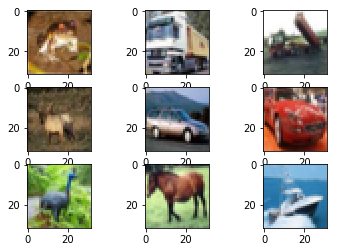

In [7]:
#load data
img_rows, img_cols , channels= 32,32,3
for i in range(9):
    plt.subplot(331 + i)
    plt.imshow(x_train[i])
plt.show()

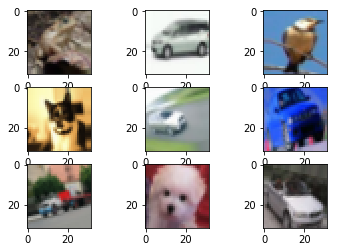

In [8]:
#augmentation images
for X_batch, y_batch in datagen.flow(x_train, y_train, batch_size=9):
    for i in range(9):
        plt.subplot(331 + i)
        plt.imshow(X_batch[i].astype(np.uint8))
    plt.show()
    break

In [9]:
# build again, same model as model1

input_shape = (32, 32, 3)
optimizer = optimizers.Adam(lr=0.001, decay=0, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=input_shape, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))   

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))  

model.add(Conv2D(128, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))  

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer=optimizer)
print(model.summary())


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
__________

In [10]:
# train with image augmentation
history=model.fit_generator(datagen.flow(x_tr, y_tr, batch_size=128),
                    steps_per_epoch = len(x_train) / 128, epochs=100, validation_data=(x_val, y_val))

Epoch 1/100
391/390 [==============================] - 33s 85ms/step - loss: 1.4323 - acc: 0.4846 - val_loss: 1.2382 - val_acc: 0.5757
Epoch 2/100
391/390 [==============================] - 31s 80ms/step - loss: 1.0243 - acc: 0.6319 - val_loss: 0.9690 - val_acc: 0.6668
Epoch 3/100
391/390 [==============================] - 32s 81ms/step - loss: 0.8593 - acc: 0.6939 - val_loss: 1.0878 - val_acc: 0.6343
Epoch 4/100
391/390 [==============================] - 32s 81ms/step - loss: 0.7773 - acc: 0.7250 - val_loss: 1.1402 - val_acc: 0.6487
Epoch 5/100
391/390 [==============================] - 30s 76ms/step - loss: 0.7158 - acc: 0.7483 - val_loss: 0.7874 - val_acc: 0.7313
Epoch 6/100
391/390 [==============================] - 27s 70ms/step - loss: 0.6604 - acc: 0.7691 - val_loss: 0.6125 - val_acc: 0.7841
Epoch 7/100
391/390 [==============================] - 31s 78ms/step - loss: 0.6142 - acc: 0.7858 - val_loss: 0.6336 - val_acc: 0.7806
Epoch 8/100
391/390 [==============================] - 

391/390 [==============================] - 35s 91ms/step - loss: 0.1978 - acc: 0.9289 - val_loss: 0.4032 - val_acc: 0.8802
Epoch 62/100
391/390 [==============================] - 31s 80ms/step - loss: 0.1910 - acc: 0.9319 - val_loss: 0.3998 - val_acc: 0.8745
Epoch 63/100
391/390 [==============================] - 30s 76ms/step - loss: 0.1937 - acc: 0.9309 - val_loss: 0.3989 - val_acc: 0.8769
Epoch 64/100
391/390 [==============================] - 36s 93ms/step - loss: 0.1959 - acc: 0.9290 - val_loss: 0.4250 - val_acc: 0.8725
Epoch 65/100
391/390 [==============================] - 34s 86ms/step - loss: 0.1937 - acc: 0.9308 - val_loss: 0.4073 - val_acc: 0.8733
Epoch 66/100
391/390 [==============================] - 36s 93ms/step - loss: 0.1932 - acc: 0.9305 - val_loss: 0.4140 - val_acc: 0.8756
Epoch 67/100
391/390 [==============================] - 34s 87ms/step - loss: 0.1851 - acc: 0.9334 - val_loss: 0.3597 - val_acc: 0.8877
Epoch 68/100
391/390 [==============================] - 32s 8

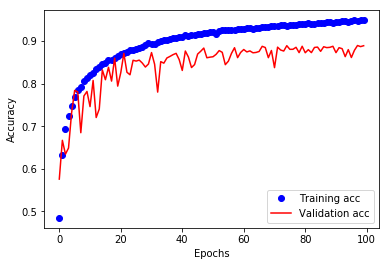

In [11]:
acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## 3. Train (again) and evaluate the model

- To this end, you have found the "best" hyper-parameters. 
- Now, fix the hyper-parameters and train the network on the entire training set (all the 50K training samples)
- Evaluate your model on the test set.

### 3.1. Train the model on the entire training set

Why? Previously, you used 40K samples for training; you wasted 10K samples for the sake of hyper-parameter tuning. Now you already know the hyper-parameters, so why not using all the 50K samples for training?

In [12]:
# <Compile your model again (using the same hyper-parameters)>
# <Compile your model again (using the same hyper-parameters)>
model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer=optimizer)


In [13]:
# <Train your model on the entire training set (50K samples)>
# <Use (x_train, y_train_vec) instead of (x_tr, y_tr)>
# <Do NOT use the validation_data option (because now you do not have validation data)>

history = model.fit(x_train, y_train_vec, batch_size=128, epochs=30)

Epoch 1/30
50000/50000 [==============================] - 11s 222us/step - loss: 0.2461 - acc: 0.9175
Epoch 2/30
50000/50000 [==============================] - 9s 181us/step - loss: 0.1238 - acc: 0.9580
Epoch 3/30
50000/50000 [==============================] - 9s 176us/step - loss: 0.0885 - acc: 0.9697
Epoch 4/30
50000/50000 [==============================] - 9s 178us/step - loss: 0.0690 - acc: 0.9766
Epoch 5/30
50000/50000 [==============================] - 9s 180us/step - loss: 0.0593 - acc: 0.9794
Epoch 6/30
50000/50000 [==============================] - 9s 177us/step - loss: 0.0518 - acc: 0.9818
Epoch 7/30
50000/50000 [==============================] - 9s 173us/step - loss: 0.0433 - acc: 0.9845
Epoch 8/30
50000/50000 [==============================] - 9s 181us/step - loss: 0.0438 - acc: 0.9848
Epoch 9/30
50000/50000 [==============================] - 9s 177us/step - loss: 0.0394 - acc: 0.9861
Epoch 10/30
50000/50000 [==============================] - 9s 175us/step - loss: 0.0372 - 

In [15]:
loss_and_acc = model.evaluate(x_test, y_test_vec)
print('test loss = ' + str(loss_and_acc[0]))
print('test accuracy = ' + str(loss_and_acc[1]))

loss_and_acc = model.evaluate(x_train, y_train_vec)
print('train loss = ' + str(loss_and_acc[0]))
print('train accuracy = ' + str(loss_and_acc[1]))

loss_and_acc = model.evaluate(x_val, y_val)
print('val loss = ' + str(loss_and_acc[0]))
print('val accuracy = ' + str(loss_and_acc[1]))

10000/10000 [==============================] - 2s 196us/step
test loss = 0.5324792645046488
test accuracy = 0.8867
50000/50000 [==============================] - 8s 155us/step
train loss = 0.021969471580665558
train accuracy = 0.99198
10000/10000 [==============================] - 2s 154us/step
val loss = 0.0240235571386409
val accuracy = 0.9911
